# Load Data

The objectives of this notebook are:
* Load the Cov-19 relevant datasets
* Clean this dataset
* Explore the *Argentina* related dataset 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import datetime
# import plotly.express as px
#import theme

%matplotlib inline

<based on this notebook "https://notebooks.ai/rmotr-curriculum/covid-19-40c03c06/Part+2.ipynb">_

## Load data

In [2]:
COVID_CONFIRMED_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
covid_confirmed = pd.read_csv(COVID_CONFIRMED_URL)

COVID_DEATHS_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
covid_deaths = pd.read_csv(COVID_DEATHS_URL)

COVID_RECOVERED_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
covid_recovered = pd.read_csv(COVID_RECOVERED_URL)

## Clean data

Tables that we have just read, contain information in _wide_ format, this is a list of countries, with their confirmed/recovered/lethal cases per date as columns.

The confirmed table looks just like this:

In [3]:
covid_confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,82,114,147,177,212,272,322,411,599,599.0
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,773,839,825,878,889,924,963,1007,1086,1086.0
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,212,226,243,266,313,345,385,432,455,455.0
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,2,2.0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,238,428,566,673,790,900,1030,1183,1306,1306.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,NaN,Jersey,49.1900,-2.1100,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
497,NaN,Puerto Rico,18.2000,-66.5000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
498,NaN,Republic of the Congo,-1.4400,15.5560,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
499,NaN,The Bahamas,24.2500,-76.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


This is why we need to **UNpivot** the tables, so they take a _long_ format, and they have a row per date

In [4]:
covid_confirmed_long = pd.melt(covid_confirmed,
                               id_vars=covid_confirmed.iloc[:, :4],
                               var_name='date',
                               value_name='confirmed')

covid_deaths_long = pd.melt(covid_deaths,
                               id_vars=covid_deaths.iloc[:, :4],
                               var_name='date',
                               value_name='deaths')

covid_recovered_long = pd.melt(covid_recovered,
                               id_vars=covid_recovered.iloc[:, :4],
                               var_name='date',
                               value_name='recovered')

In [5]:
covid_confirmed_long

,Province/State,Country/Region,Lat,Long,date,confirmed
0,NaN,Thailand,15.0000,101.0000,1/22/20,2.0
1,NaN,Japan,36.0000,138.0000,1/22/20,2.0
2,NaN,Singapore,1.2833,103.8333,1/22/20,0.0
3,NaN,Nepal,28.1667,84.2500,1/22/20,0.0
4,NaN,Malaysia,2.5000,112.5000,1/22/20,0.0
...,...,...,...,...,...,...
31057,NaN,Jersey,49.1900,-2.1100,3/23/20,0.0
31058,NaN,Puerto Rico,18.2000,-66.5000,3/23/20,0.0
31059,NaN,Republic of the Congo,-1.4400,15.5560,3/23/20,0.0
31060,NaN,The Bahamas,24.2500,-76.0000,3/23/20,0.0


Now, we would like to complete the columns to each country/region so they have the _confirmed, recovered and deaths_ columns.

In [6]:
covid_df = covid_confirmed_long
covid_df['deaths'] = covid_deaths_long['deaths']
covid_df['recovered'] = covid_recovered_long['recovered']

We could make explicit the information regarding the disease status of **ACTIVE**, so we have information of the number of cases **able to spread Cov-19**.

In [7]:
covid_df['active'] = covid_df['confirmed'] - covid_df['deaths'] - covid_df['recovered']


In [8]:
covid_df.head()

,Province/State,Country/Region,Lat,Long,date,confirmed,deaths,recovered,active
0,NaN,Thailand,15.0000,101.0000,1/22/20,2.0,0.0,0.0,2.0
1,NaN,Japan,36.0000,138.0000,1/22/20,2.0,0.0,0.0,2.0
2,NaN,Singapore,1.2833,103.8333,1/22/20,0.0,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,1/22/20,0.0,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,1/22/20,0.0,0.0,0.0,0.0


In [9]:
covid_df['Country/Region'].replace('Mainland China', 'China', inplace=True)
covid_df[['Province/State']] = covid_df[['Province/State']].fillna('')
covid_df.fillna(0, inplace=True)


Save the data in new tables.

In [10]:
covid_df.to_csv('covid_df.csv', index=None)

In [11]:
# check file is OK
# pd.read_csv('covid_df.csv')

Now we aggregate the data by Country/Region

In [12]:
covid_countries_df = covid_df.groupby(['Country/Region', 'Province/State']).max().reset_index()

In [13]:
covid_countries_df

,Country/Region,Province/State,Lat,Long,date,confirmed,deaths,recovered,active
0,Afghanistan,,33.0000,65.0000,3/9/20,40.0,1.0,1.0,38.0
1,Albania,,41.1533,20.1683,3/9/20,89.0,2.0,2.0,85.0
2,Algeria,,28.0339,1.6596,3/9/20,201.0,17.0,65.0,119.0
3,Andorra,,42.5063,1.5218,3/9/20,113.0,1.0,1.0,111.0
4,Angola,,-11.2027,17.8739,3/9/20,2.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...
496,Uzbekistan,,41.3775,64.5853,3/9/20,43.0,0.0,0.0,43.0
497,Venezuela,,6.4238,-66.5897,3/9/20,70.0,0.0,15.0,70.0
498,Vietnam,,16.0000,108.0000,3/9/20,113.0,0.0,17.0,96.0
499,Zambia,,-15.4167,28.2833,3/9/20,3.0,0.0,0.0,3.0


In [14]:
covid_countries_df = covid_countries_df.groupby('Country/Region').sum().reset_index()

In [15]:
# remove unused Lon and Lat
covid_countries_df.drop(['Lat', 'Long'], axis=1, inplace=True)

In [16]:
covid_countries_df

,Country/Region,confirmed,deaths,recovered,active
0,Afghanistan,40.0,1.0,1.0,38.0
1,Albania,89.0,2.0,2.0,85.0
2,Algeria,201.0,17.0,65.0,119.0
3,Andorra,113.0,1.0,1.0,111.0
4,Angola,2.0,0.0,0.0,2.0
...,...,...,...,...,...
178,Uzbekistan,43.0,0.0,0.0,43.0
179,Venezuela,70.0,0.0,15.0,70.0
180,Vietnam,113.0,0.0,17.0,96.0
181,Zambia,3.0,0.0,0.0,3.0


In [17]:
top_10_confirmed = covid_countries_df.sort_values(by='confirmed', ascending=False).head(10)

top_10_confirmed

,Country/Region,confirmed,deaths,recovered,active
33,China,81440.0,3274.0,72815.0,60111.0
86,Italy,59138.0,5476.0,7024.0,46638.0
172,US,33796.0,440.0,202.0,33352.0
155,Spain,28768.0,1772.0,2575.0,24421.0
64,Germany,24873.0,94.0,266.0,24513.0
82,Iran,21638.0,1685.0,7931.0,12022.0
59,France,16176.0,674.0,2206.0,13866.0
93,"Korea, South",8897.0,104.0,2909.0,7577.0
160,Switzerland,7245.0,98.0,131.0,7016.0
176,United Kingdom,5741.0,282.0,67.0,5392.0


### Explore data per country
Now we can explore the information we have making individual plots per region

In [18]:
covid_countries_date_df = covid_df.groupby(['Country/Region', 'date'], sort=False).sum().reset_index()


In [19]:
covid_arg = covid_countries_date_df[covid_countries_date_df['Country/Region'] == 'Argentina']

In [20]:
covid_arg.head()

,Country/Region,date,Lat,Long,confirmed,deaths,recovered,active
60,Argentina,1/22/20,-38.4161,-63.6167,0.0,0.0,0.0,0.0
243,Argentina,1/23/20,-38.4161,-63.6167,0.0,0.0,0.0,0.0
426,Argentina,1/24/20,-38.4161,-63.6167,0.0,0.0,0.0,0.0
609,Argentina,1/25/20,-38.4161,-63.6167,0.0,0.0,0.0,0.0
792,Argentina,1/26/20,-38.4161,-63.6167,0.0,0.0,0.0,0.0


Plot: evolucion en argentina

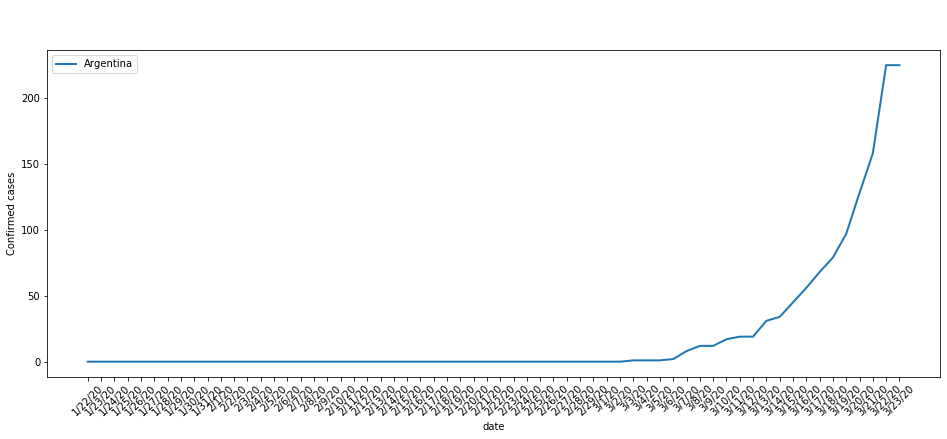

In [21]:
fig, ax = plt.subplots(figsize=(16, 6))

sns.lineplot(x=covid_arg['date'], y=covid_arg['confirmed'], sort=False, linewidth=2)
plt.suptitle("COVID-19 per country cases over the time", fontsize=16, fontweight='bold', color='white')

plt.xticks(rotation=45)
plt.ylabel('Confirmed cases')

ax.legend(['Argentina', 'World except China'])

plt.show()

Plot: evolucion en Argentina en escala logaritmica

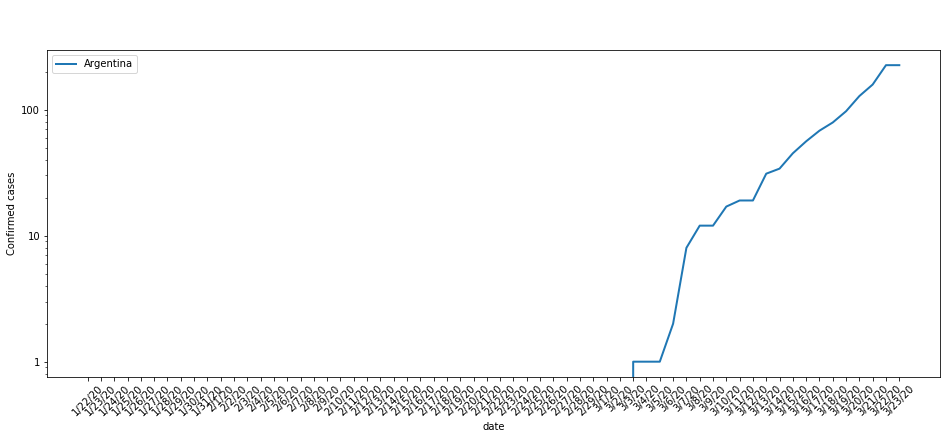

In [22]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.set(yscale="log")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))

sns.lineplot(x=covid_arg['date'], y=covid_arg['confirmed'], sort=False, linewidth=2)

plt.suptitle("COVID-19 per country cases over the time", fontsize=16, fontweight='bold', color='white')
plt.title("(logarithmic scale)", color='white')

plt.xticks(rotation=45)
plt.ylabel('Confirmed cases')

ax.legend(['Argentina'])

plt.show()

## Comparemos con otros paises

In [75]:
covid_arg = covid_countries_date_df[covid_countries_date_df['Country/Region'] == 'Argentina']
covid_chile = covid_countries_date_df[covid_countries_date_df['Country/Region'] == 'Chile']
covid_esp = covid_countries_date_df[covid_countries_date_df['Country/Region'] == 'Spain']
covid_ita = covid_countries_date_df[covid_countries_date_df['Country/Region'] == 'Italy']

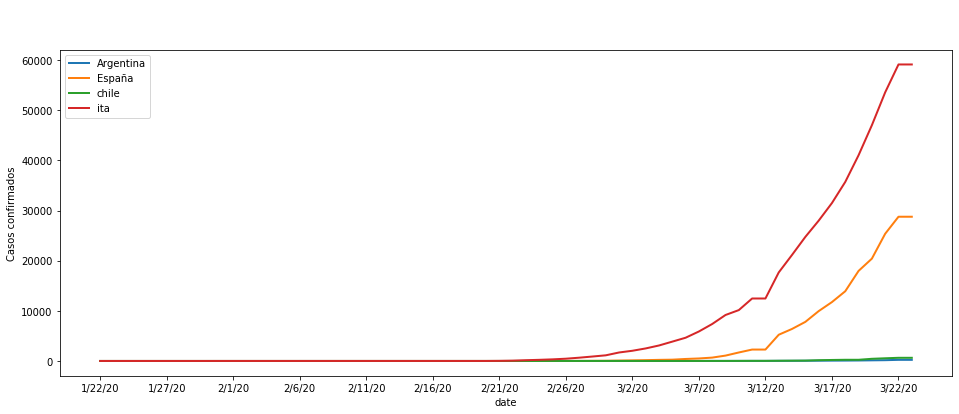

In [62]:
fig, ax = plt.subplots(figsize=(16, 6))
#ax.set(yscale="log")
#ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))

sns.lineplot(x=covid_arg['date'], y=covid_arg['confirmed'], sort=False, linewidth=2)

sns.lineplot(x=covid_esp['date'], y=covid_esp['confirmed'], sort=False, linewidth=2)

sns.lineplot(x=covid_chile['date'], y=covid_chile['confirmed'], sort=False, linewidth=2)

sns.lineplot(x=covid_ita['date'], y=covid_ita['confirmed'], sort=False, linewidth=2)

plt.suptitle("COVID-19 per country cases over the time", fontsize=16, fontweight='bold', color='white')
plt.title("(logarithmic scale)", color='white')

ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.xticks(rotation=0)
plt.ylabel('Casos confirmados')

ax.legend(['Argentina', 'España', 'chile', 'ita'])

plt.show()

In [63]:
t = []
d0 = datetime.datetime.strptime("1/1/20", '%m/%d/%y')
for d in covid_ita['date']:
    elapsed_days = (datetime.datetime.strptime(d, '%m/%d/%y') - d0).days
    t.append(elapsed_days)

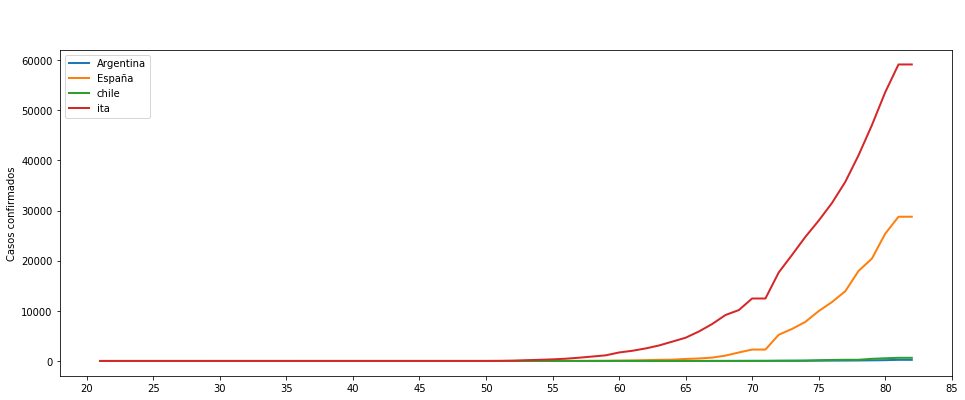

In [64]:
fig, ax = plt.subplots(figsize=(16, 6))
#ax.set(yscale="log")
#ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))

sns.lineplot(x=t, y=covid_arg['confirmed'], sort=False, linewidth=2)
sns.lineplot(x=t, y=covid_esp['confirmed'], sort=False, linewidth=2)
sns.lineplot(x=t, y=covid_chile['confirmed'], sort=False, linewidth=2)
sns.lineplot(x=t, y=covid_ita['confirmed'], sort=False, linewidth=2)

plt.suptitle("COVID-19 per country cases over the time", fontsize=16, fontweight='bold', color='white')
plt.title("(logarithmic scale)", color='white')

ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.xticks(rotation=0)
plt.ylabel('Casos confirmados')

ax.legend(['Argentina', 'España', 'chile', 'ita'])

plt.show()

In [65]:
z = covid_arg['confirmed']
patient_zero = z.to_numpy().nonzero()[0][0]
t_arg = t - patient_zero

z = covid_ita['confirmed']
patient_zero = z.to_numpy().nonzero()[0][0]
t_ita = t - patient_zero

z = covid_chile['confirmed']
patient_zero = z.to_numpy().nonzero()[0][0]
t_chile = t - patient_zero

z = covid_esp['confirmed']
patient_zero = z.to_numpy().nonzero()[0][0]
t_esp = t - patient_zero

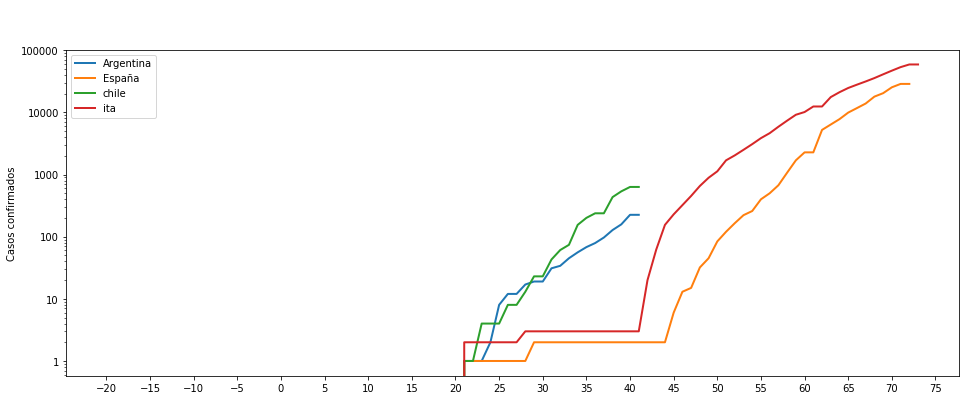

In [66]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.set(yscale="log")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))

sns.lineplot(x=t_arg, y=covid_arg['confirmed'], sort=False, linewidth=2)
sns.lineplot(x=t_esp, y=covid_esp['confirmed'], sort=False, linewidth=2)
sns.lineplot(x=t_chile, y=covid_chile['confirmed'], sort=False, linewidth=2)
sns.lineplot(x=t_ita, y=covid_ita['confirmed'], sort=False, linewidth=2)

plt.suptitle("COVID-19 per country cases over the time", fontsize=16, fontweight='bold', color='white')
plt.title("(logarithmic scale)", color='white')

ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.xticks(rotation=0)
plt.ylabel('Casos confirmados')

ax.legend(['Argentina', 'España', 'chile', 'ita'])

plt.show()

In [67]:
df_world = pd.read_csv('../dat/pop_area.csv')

In [68]:
list(df_world['country'])[1:10]

['United States',
 'Indonesia',
 'Pakistan',
 'Brazil',
 'Nigeria',
 'Bangladesh',
 'Russia',
 'Mexico',
 'Japan']

In [104]:
covid_pais = covid_countries_date_df[covid_countries_date_df['Country/Region'] == 'Russia']
covid_pais.size

496

In [105]:
t = []
d0 = datetime.datetime.strptime("1/1/20", '%m/%d/%y')
for d in covid_ita['date']:
    elapsed_days = (datetime.datetime.strptime(d, '%m/%d/%y') - d0).days
    t.append(elapsed_days)

In [116]:
lista = ['Argentina', 'Chile', 'United States', 'Germany', 'Iran', 'Italy']
lista = ['Argentina', 'Chile', 'Germany', 'Iran', 'Italy']
y_all = []
t_all = []
for pais in lista:
    popu = df_world[df_world['country'] == pais]['population'].values[0]
    area = df_world[df_world['country'] == pais]['area'].values[0]
    covid_pais = covid_countries_date_df[covid_countries_date_df['Country/Region'] == pais]
    
    z = covid_pais['confirmed']
    patient_zero = z.to_numpy().nonzero()[0][0]
    
    t_pais = t - patient_zero
    
    y_pais = covid_pais['confirmed'] / popu * 1.e6   
    
    y_all.append(y_pais)
    t_all.append(t_pais)
    

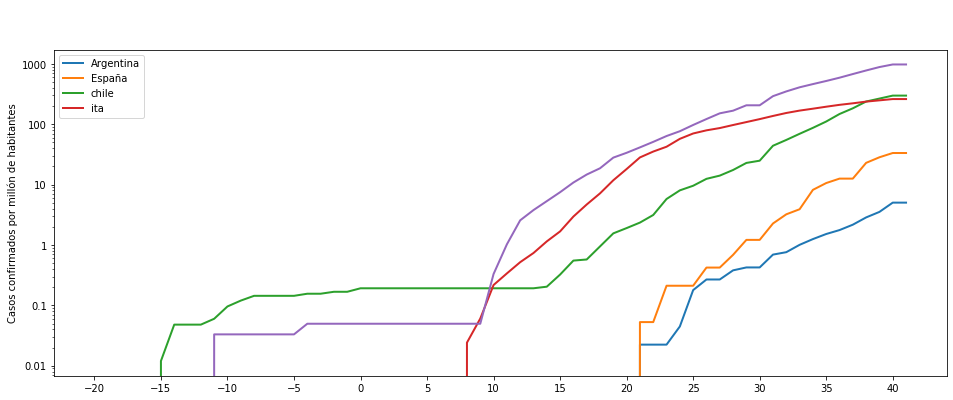

In [117]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.set(yscale="log")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))

for y in y_all:
    sns.lineplot(x=t_arg, y=y, sort=False, linewidth=2)

plt.suptitle("COVID-19 per country cases over the time", fontsize=16, fontweight='bold', color='white')
plt.title("(logarithmic scale)", color='white')

ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.xticks(rotation=0)
plt.ylabel('Casos confirmados por millón de habitantes')

ax.legend(['Argentina', 'España', 'chile', 'ita'])

plt.show()